In [9]:
from model.VQGAN.vqgan import VQModel 
# checkpoint = '/mnt/disk3/tiennh/taming-transformers/logs/2023-09-14T22-05-12_custom_vqgan/checkpoints/last.ckpt' 

In [1]:
!kaggle datasets download -d balraj98/edges2shoes-dataset

zsh:1: command not found: kaggle


In [11]:
import yaml
import argparse 
import omegaconf.dictconfig
import os
f = open('/mnt/disk1/mbbank/tien/BBDM_folk/configs/test_vqgan1.yaml', 'r')
dict_config = yaml.load(f, Loader=yaml.FullLoader)

def dict2namespace(config):
    namespace = argparse.Namespace()
    for key, value in config.items():
        if isinstance(value, dict) or isinstance(value, omegaconf.dictconfig.DictConfig):
            new_value = dict2namespace(value)
        else:
            new_value = value
        setattr(namespace, key, new_value)
    return namespace

nconfig = dict2namespace(dict_config)
vq = VQModel(**vars(nconfig.model.VQGAN.params))


input = x 
quant, diff, _ = vq.encode(input)
dec = vq.decode(quant)
x.shape ,dec.shape, quant.shape


Working with z of shape (1, 3, 64, 64) = 12288 dimensions.


(torch.Size([1, 1, 256, 256]),
 torch.Size([1, 1, 256, 256]),
 torch.Size([1, 3, 64, 64]))

In [3]:
nconfig.model.VQGAN.params.lossconfig

Namespace(target='torch.nn.Identity')

In [15]:
#  copy random 100 images from test to test_100
import os
# import shutil
# import random
import numpy as np
# import glob
import tqdm

i = 0
file_names = []
for npy_file in os.listdir('/mnt/disk3/tiennh/data4vq/test'):
    i += 1
    if i == 100: 
        break
    file_names.append(npy_file)

In [17]:
from tqdm import tqdm
def cal_mae(weight_path, test_dir_path, file_names): 
    f = open('/mnt/disk1/mbbank/tien/BBDM_folk/configs/test_vqgan.yaml', 'r')
    dict_config = yaml.load(f, Loader=yaml.FullLoader)
    nconfig = dict2namespace(dict_config) 
    nconfig.model.VQGAN.params.ckpt_path = weight_path 
    vq = VQModel(**vars(nconfig.model.VQGAN.params))
    
    # load npy file in test_dir_path 
    maes = []

    for npy_file in tqdm(file_names):
       
        x_np = np.load(os.path.join(test_dir_path, npy_file), allow_pickle=True)
        x = torch.from_numpy(x_np)
        x = x.unsqueeze(0)
        input = x 
        quant, diff, _ = vq.encode(input)
        dec = vq.decode(quant)
        # caculate MAE between input and dec
        mae = torch.abs(dec - x ).mean()
        maes.append(mae.item())
        # print(f'File: {npy_file}, MAE: {torch.mean(diff).item()}')
    print(f'MAE: {np.mean(maes)}')
    print("len :", len(maes))

In [18]:
cal_mae('/mnt/disk3/tiennh/taming-transformers/last_82.ckpt', '/mnt/disk3/tiennh/data4vq/test', file_names)


Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
Restored from /mnt/disk3/tiennh/taming-transformers/last_82.ckpt


100%|██████████| 99/99 [03:17<00:00,  1.99s/it]

MAE: 0.0064533572559329596
len : 99


In [19]:
cal_mae('/mnt/disk3/tiennh/taming-transformers/last_90.ckpt', '/mnt/disk3/tiennh/data4vq/test', file_names)

Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
Restored from /mnt/disk3/tiennh/taming-transformers/last_90.ckpt


100%|██████████| 99/99 [03:17<00:00,  1.99s/it]

MAE: 0.007666535183994306
len : 99


In [21]:
cal_mae('/mnt/disk3/tiennh/taming-transformers/last_55.ckpt', '/mnt/disk3/tiennh/data4vq/test', file_names)

Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
Restored from /mnt/disk3/tiennh/taming-transformers/last_55.ckpt


100%|██████████| 99/99 [03:08<00:00,  1.90s/it]

MAE: 0.006440543520236106
len : 99


In [10]:
dec.shape

torch.Size([1, 1, 256, 256])

In [11]:
dec_np = dec.detach().numpy()
dec_np.shape

(1, 1, 256, 256)

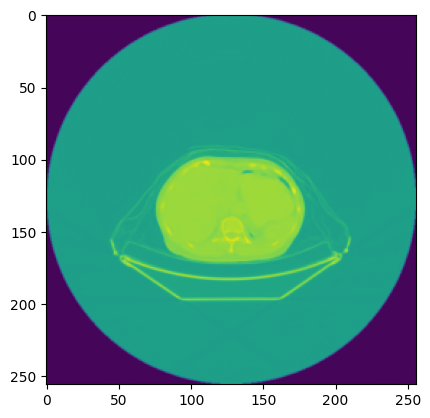

In [12]:
plt.imshow(dec_np[0][0])   